<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/8%20Artificial%20Neural%20Network/ANNwithOpenCVonMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks - Multi-Layer Perceptrons with OpenCV
# with MNIST Handwritting Digits

OpenCV provides the artificial neural networks (ANN-MLP), which is very similar to that of Keras.

https://www.secn.net/article/684929  opencv(python)使用ann神经网络识别手写数字


https://medium.com/@prtk13061992/mnist-dataset-using-deep-learning-algorithm-ann-c6f83aa594f5

In [1]:
from keras.datasets import mnist
from keras import utils
import numpy as np
import matplotlib.pyplot as plt
import cv2
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
def show_random_digits(X, Y, row, col):
    print("The true label is shown in green.")
    _, axarr = plt.subplots(row, col, figsize=(6, 6))
    for i in range(row):
        filter = np.where((Y == i))
        X1, Y1 = X[filter], Y[filter]
        for j in range(col):
            index = np.random.randint(X1.shape[0])
            axarr[i, j].imshow(X1[index], cmap="binary")
            axarr[i, j].axis('off')
            axarr[i, j].text(0.5, 1, str(Y1[index]), fontsize=12, c='g')
    plt.show()

In [3]:
def show_random_result(X, Y, row, col, pred):
    print("The true label is shown in green, and the predicted value is shown within [] in red.")
    _, axarr = plt.subplots(row, col, figsize=(6, 6))
    for i in range(row):
        for j in range(col):
            index = np.random.randint(X.shape[0])
            axarr[i, j].imshow(X[index], cmap="binary")
            axarr[i, j].axis('off')
            axarr[i, j].text(0.5, 1, str(Y[index]), fontsize=12, c='g')
            axarr[i, j].text(10,  1, str(pred[index]), fontsize=12, c='r')
    plt.show()

In [4]:
def create_ANN(layers):
    ann=cv2.ml.ANN_MLP_create()
    #设置神经网络层的结构 输入层为784 隐藏层为80 输出层为10
    ann.setLayerSizes(np.array(layers))
    #设置网络参数为误差反向传播法
    ann.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
    #设置激活函数为sigmoid
    ann.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM)
    #设置训练迭代条件
    #结束条件为训练30次或者误差小于0.00001
    ann.setTermCriteria((cv2.TermCriteria_EPS|cv2.TermCriteria_COUNT,100,0.0001))
    return ann

In [27]:
#计算测试数据上的识别率
def evaluate_acc(ann,test_images,test_labels):
    #采用的sigmoid激活函数，需要对结果进行置信度处理
    #对于大于0.99的可以确定为1 对于小于0.01的可以确信为0
    test_ret=ann.predict(test_images)
    #预测结果是一个元组
    test_pre=test_ret[1]
    #可以直接最大值的下标 (10000,)
    test_pre=test_pre.argmax(axis=1)
    true_sum=(test_pre==test_labels)
    return true_sum.mean()

## Load MNIST Dataset

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)
The true label is shown in green.


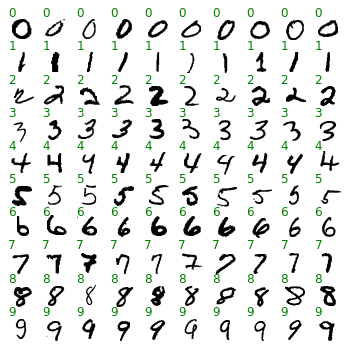

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))
show_random_digits(X_train, y_train, 10, 10)

In [6]:
w, h = X_test[0,:,:].shape
X_train = X_train.reshape(X_train.shape[0], w * h).astype(np.float32)
X_test  = X_test.reshape(  X_test.shape[0], w * h).astype(np.float32)
X_train = X_train / 255
X_test  = X_test / 255
y_train_onehot = utils.to_categorical(y_train)
y_train_onehot = np.float32(y_train_onehot)
y_test  = np.uint(y_test)
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))
print('y_train_onehot:  ' + str(y_train_onehot.shape))

X_train: (60000, 784)
y_train: (60000,)
X_test:  (10000, 784)
y_test:  (10000,)
y_train_onehot:  (60000, 10)


In [7]:
#定义神经网络模型结构
ann=create_ANN([784,128,10])
#开始训练
ann.train(X_train, cv2.ml.ROW_SAMPLE, y_train_onehot)


True

In [8]:
#保存模型
ann.save('mnist_ann_784_128_10.xml')


In [14]:
# mount it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls -l

total 4280
drwx------ 5 root root    4096 Apr 26 00:30 drive
-rw-r--r-- 1 root root  247465 Apr 26 00:27 mnist_ann_784_10.xml
-rw-r--r-- 1 root root 2735786 Apr 26 00:54 mnist_ann_784_128_10.xml
-rw-r--r-- 1 root root 1387892 Apr 26 00:43 mnist_ann_784_64_10.xml
drwxr-xr-x 1 root root    4096 Apr 21 13:39 sample_data


In [10]:
!ls
!cp mnist_ann_784_128_10.xml drive/MyDrive/'Colab Notebooks'
!ls drive/MyDrive/'Colab Notebooks'

drive		      mnist_ann_784_128_10.xml	sample_data
mnist_ann_784_10.xml  mnist_ann_784_64_10.xml
 ANNwithOpenCVonMNIST.ipynb	        mnist_ann_784_10.xml
 auxiliary_classifier_GAN.ipynb         mnist_ann_784_128_10.xml
'bidirectional GAN.ipynb'	        mnist_ann_784_256_10.xml
 boundary-seeking_GAN.ipynb	        mnist_ann_784_64_10.xml
 conditional_GAN.ipynb		        OpenCV_Basics.ipynb
 context_encoders.ipynb		        stock_chart.ipynb
 coupled_GAN.ipynb		        stock_intraday.ipynb
'Face Recognition with OpenCV.ipynb'    SVMwithOpenCVonMNIST.ipynb
 generative_adversarial_network.ipynb   Untitled0.ipynb
 K-NearestNeighborsWithOpenCV.ipynb     Untitled1.ipynb


In [ ]:
#加载模型
myann=cv2.ml.ANN_MLP_load('mnist_ann.xml')

In [11]:
#采用的sigmoid激活函数，需要对结果进行置信度处理
#对于大于0.99的可以确定为1 对于小于0.01的可以确信为0
test_ret=ann.predict(X_test)
#预测结果是一个元组
test_pre=test_ret[1]



In [12]:
#可以直接最大值的下标 (10000,)
predict=test_pre.argmax(axis=1)
print(predict.shape)
print(predict)
print("Accuracy Score:", accuracy_score(y_test, predict))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predict))
print("\nClassification Report:\n", classification_report(y_test, predict))

(10000,)
[7 2 1 ... 4 5 6]
Accuracy Score: 0.9217

Confusion Matrix:
 [[ 960    1    1    1    1    3    8    2    3    0]
 [   5 1117    6    1    0    0    2    1    3    0]
 [  36    2  931    9    6    5    5   17   19    2]
 [  30    1   13  917    1   12    1   21   10    4]
 [  10    2    5    1  920    0   12    4    3   25]
 [  52    0    2   21    8  776    8    9   12    4]
 [  24    4    1    2    2   19  902    2    0    2]
 [  13   10   17    4    7    0    1  959    2   15]
 [  53    1    7   10   13   20    6   14  844    6]
 [  31    6    2    3   35    6    0   29    6  891]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.88       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.90      0.92      1032
           3       0.95      0.91      0.93      1010
           4       0.93      0.94      0.93       982
           5       0.92      0.87      0.90      